# __Topic 1: Cannabis Recreational Store Growth Analysis in Canada__
This notebook provides an analysis of the recreational store growth of cannabis in Canada. The analysis includes data importation, cleaning, summary statistics, and visualizations to understand the trends in cannabis sales, production, and inventory.


## Data Import and Cleaning


First, we import the dataset and clean it by handling missing values and converting data types appropriately.

In [309]:
#import necessary libraries and dependencies for the analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Resources/Cannabis_Data.csv'
cannabis_data = pd.read_csv(file_path)

# Convert 'year_-_month' to datetime format and clean numeric columns
cannabis_data['year_-_month'] = pd.to_datetime(cannabis_data['year_-_month'].str.strip(), format='%Y-%m', errors='coerce')
numeric_columns = ['unpackaged_production_units', 'unpackaged_inventory_units', 
                   'packaged_production_units', 'packaged_inventory_units_-_federal_licence_holders',
                   'packaged_inventory_units_-_provincial_distributors_and_retailer', 
                   'sales_units_-_medical', 'sales_units_-_non-medical',
                   'unpackaged_production_kilograms', 'unpackaged_inventory_kilograms',
                   'packaged_production_kilograms', 'packaged_inventory_kilograms_-_federal_licence_holders',
                   'packaged_inventory_kilograms_-_provincial_distributors_and_reta',
                   'sales_kilograms_-_medical', 'sales_kilograms_-_non-medical']
cannabis_data[numeric_columns] = cannabis_data[numeric_columns].replace('n/a\xa0/ n/d', pd.NA)
cannabis_data[numeric_columns] = cannabis_data[numeric_columns].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))


## Data Summary Statistics

Next, we compute summary statistics for the relevant columns to understand the data distribution.

In [310]:
#showw dataframe summary statistics
summary_statistics = cannabis_data.describe()
summary_statistics.loc[:, ['packaged_production_units', 
                           'packaged_inventory_units_-_federal_licence_holders', 
                           'packaged_inventory_units_-_provincial_distributors_and_retailer', 
                           'sales_units_-_medical', 'sales_units_-_non-medical']]


,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
count,270.00,270.00,270.00,270.00,270.00
mean,2681744.39,5957971.03,4287431.00,104952.22,2102976.48
min,0.00,0.00,0.00,0.00,0.00
25%,3226.75,29959.50,45597.00,153.00,2933.25
50%,135264.50,331181.00,265947.00,19844.00,48466.50
75%,4385962.50,10990486.75,7377674.25,226466.50,3463537.50
max,12192777.00,21759645.00,19070193.00,354673.00,10383134.00
std,3514292.19,7046292.15,5518576.48,114698.06,2964662.25


Summary

1. Packaged Production Units:

- Average: On average, there are about 2.68 million packaged production units. This suggests a significant level of production activity.
- Variability: The large standard deviation indicates that the number of production units varies widely from one period to another, which could be due to seasonal production changes, market demand, or regulatory impacts.

2. Packaged Inventory at Federal License Holders:

- Average: The average inventory held by federal license holders is around 5.96 million units. This is a substantial inventory, suggesting a well-stocked supply chain.
- Variability: High variability here also indicates that inventory levels fluctuate significantly, which could be due to varying production rates, changes in demand, or inventory management strategies.

3. Packaged Inventory at Provincial Distributors and Retailers:

- Average: The average inventory at provincial distributors and retailers is approximately 4.29 million units. This indicates that a considerable amount of cannabis products are available at the retail and distributor level.
- Variability: Similar to the federal license holders, the high variability here suggests fluctuating inventory levels, possibly influenced by consumer demand and supply chain dynamics.

4. Sales Units - Medical:

- Average: The average sales for medical purposes are about 105,000 units. Compared to non-medical sales, this is relatively lower, indicating a smaller but consistent market segment.
- Variability: The wide range in sales units might reflect differences in medical cannabis needs over time or varying patient counts.

5. Sales Units - Non-Medical:

- Average: The average non-medical sales units are about 2.10 million, showing a much larger market for recreational cannabis compared to medical cannabis.
- Variability: The high standard deviation indicates that sales volumes vary significantly, which might be influenced by consumer preferences, promotional activities, or market maturity.

## Data Visualization - Medical vs Non-Medical Sales


We create visualizations to better understand the trends and patterns in these data points, particularly focusing on the growth over time and differences between medical and non-medical sales.

We further analyze the data to compare the growth of different product types for non-medical use.

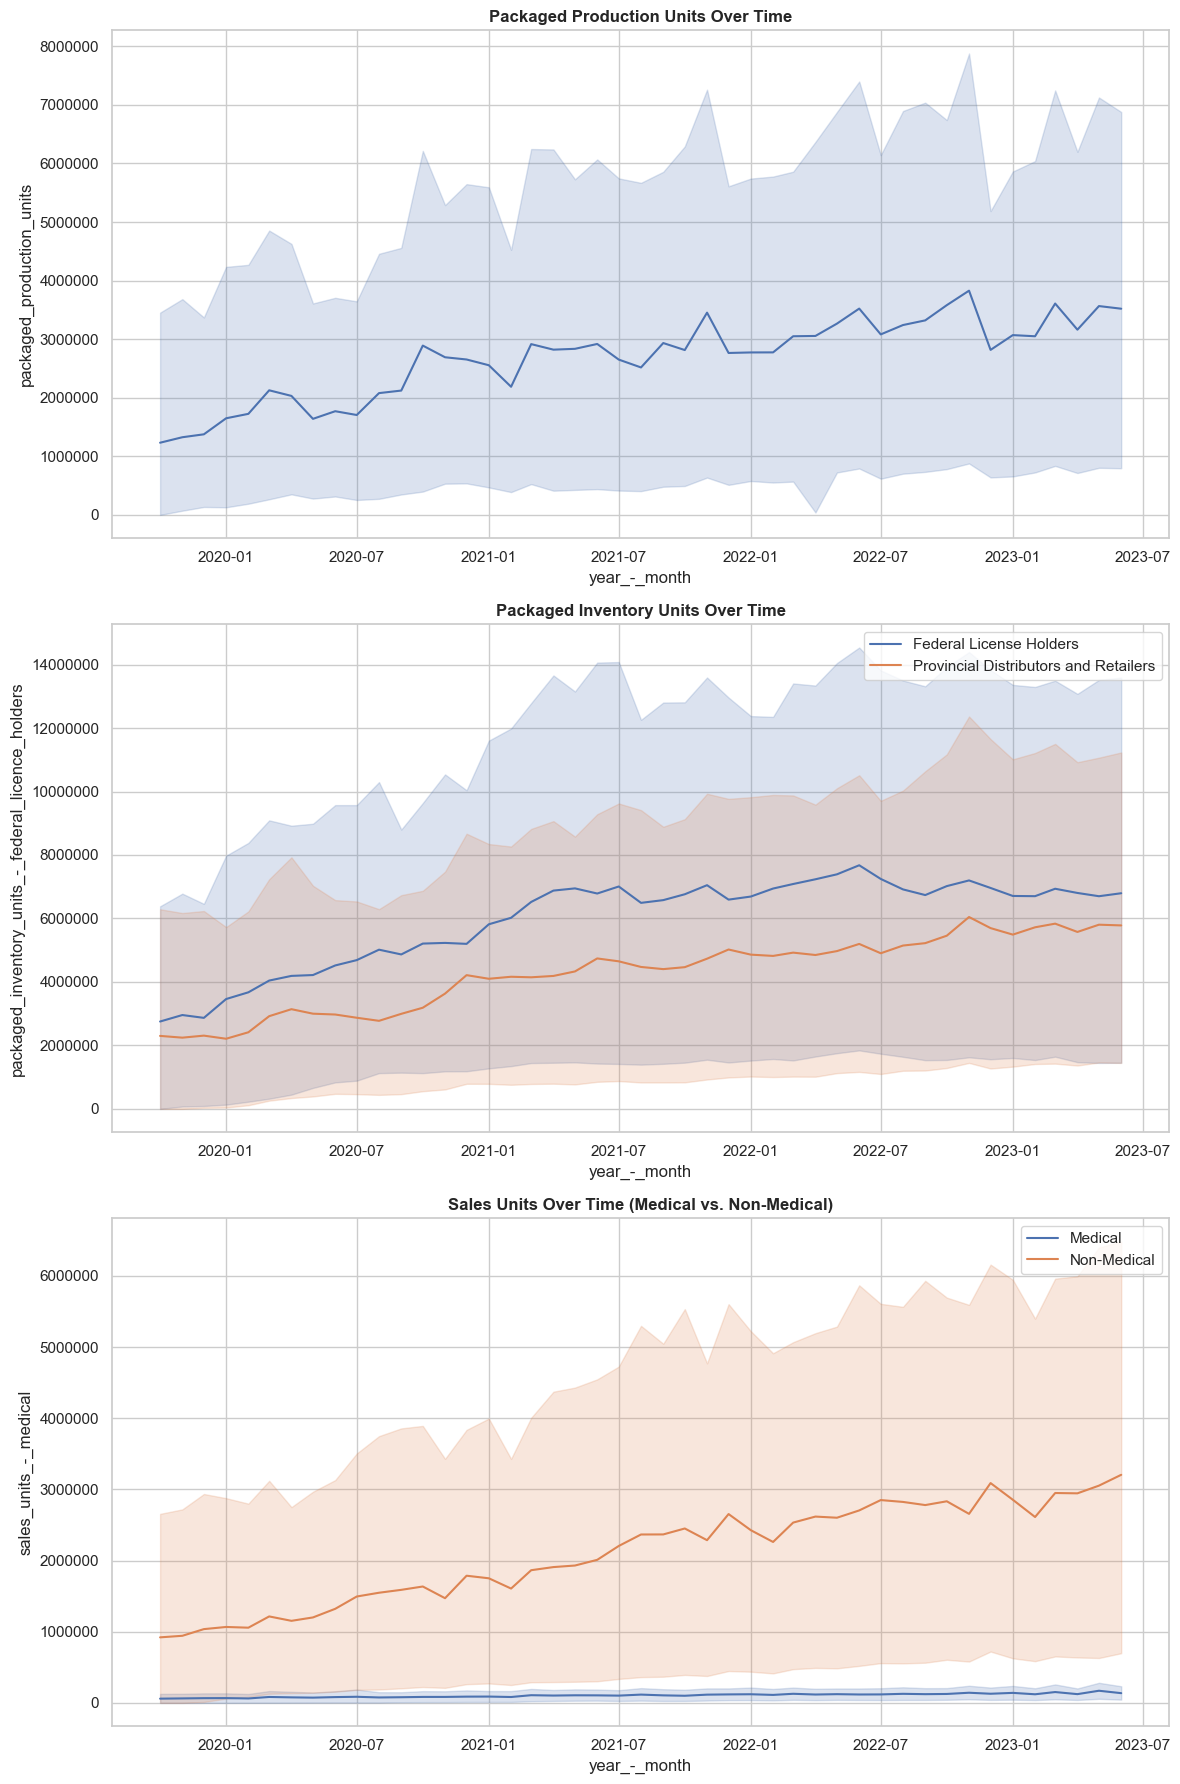

In [311]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating time series plots for key metrics
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))
plot1 = sns.lineplot(ax=axes[0], x='year_-_month', y='packaged_production_units', data=cannabis_data)
plot1.set_title("Packaged Production Units Over Time", fontweight = "bold")
plot1.ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

plot2 = sns.lineplot(ax=axes[1], x='year_-_month', y='packaged_inventory_units_-_federal_licence_holders', data=cannabis_data, label='Federal License Holders')
plot2.set_title("Packaged Inventory Units Over Time", fontweight = "bold")
plot2.ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
sns.lineplot(ax=axes[1], x='year_-_month', y='packaged_inventory_units_-_provincial_distributors_and_retailer', data=cannabis_data, label='Provincial Distributors and Retailers')

plot3 = sns.lineplot(ax=axes[2], x='year_-_month', y='sales_units_-_medical', data=cannabis_data, label='Medical')
plot3.set_title("Sales Units Over Time (Medical vs. Non-Medical)", fontweight = "bold")
plot3.ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
sns.lineplot(ax=axes[2], x='year_-_month', y='sales_units_-_non-medical', data=cannabis_data, label='Non-Medical')

plt.tight_layout()



1. Packaged Production Units Over Time:

- This graph shows how the production of packaged cannabis units has changed over time.
- Key Insight: There may be noticeable trends or fluctuations in production. These could be influenced by market demands, changes in regulations, or other industry dynamics. The audience should look for periods of significant growth or decline, which might indicate important market shifts.

2. Packaged Inventory Units Over Time:
- This chart compares inventory levels at two key stages: federal license holders and provincial distributors/retailers.
- Key Insight: By looking at how inventory levels change over time, we can understand how effectively the cannabis supply is being managed. Sharp increases or decreases might indicate changes in production strategies, shifts in demand, or alterations in regulatory frameworks.

3. Sales Units Over Time (Medical vs. Non-Medical):
- This visualization shows a comparison between sales units for medical purposes and those for non-medical (recreational) use.
- Key Insight: The trends here indicate the relative growth and demand in the medical versus recreational cannabis markets. A rising trend in non-medical sales, for instance, would suggest an expanding recreational market. The audience should note how these two sectors contrast with each other over time.

Overall Summary for the Audience:
These visualizations collectively provide a comprehensive view of the Canadian cannabis market, highlighting key aspects such as production, inventory management, and sales trends.
The data reveals the dynamic nature of the market, with significant fluctuations that could be driven by a variety of factors including consumer behavior, regulatory changes, and market maturity.
The clear difference in the scale of medical versus non-medical sales highlights the dominant role of the recreational cannabis market in Canada.
Understanding these trends is crucial for stakeholders in the cannabis industry, as they offer insights into market performance, consumer preferences, and potential areas for growth or improvement.

## Data Visualization - Product Type Analysis for Non-Medical Use

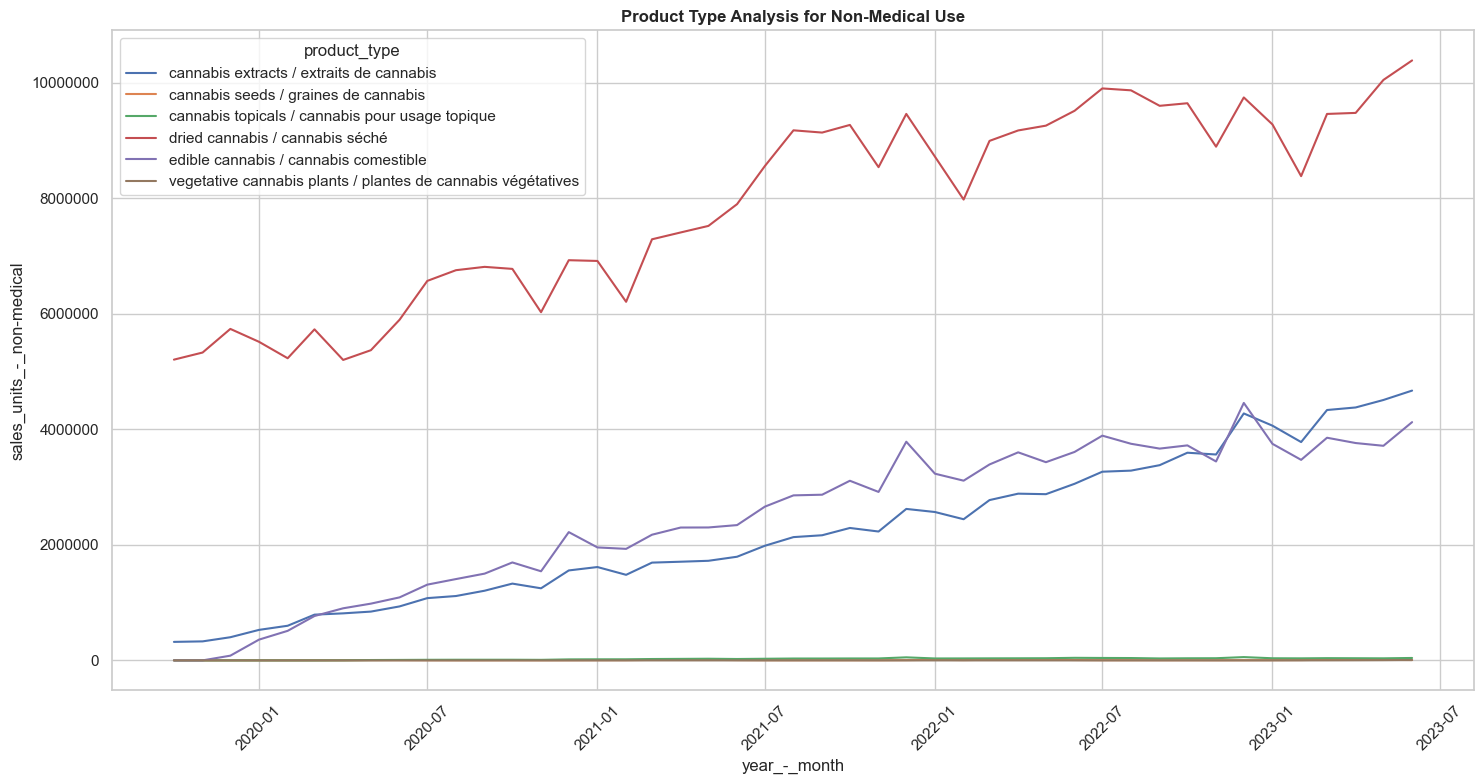

In [312]:
# Filtering and grouping data for non-medical use
non_medical_data = cannabis_data[cannabis_data['sales_units_-_non-medical'].notnull()]
grouped_data = non_medical_data.groupby(['year_-_month', 'product_type'])['sales_units_-_non-medical'].sum().reset_index()

# Visualization
plt.figure(figsize=(15, 8))
plot = sns.lineplot(x='year_-_month', y='sales_units_-_non-medical', hue='product_type', data=grouped_data)
plot.set_title("Product Type Analysis for Non-Medical Use", fontweight = "bold")
plot.ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
plt.xticks(rotation=45)

plt.tight_layout()


## Data Analysis and Conclusions

The analysis focused on comparing the growth and sales trends of different cannabis product types for non-medical (recreational) use over time. The product types included various forms of cannabis, such as extracts, seeds, etc.

### Key Findings
Diverse Growth Patterns: Each product type displayed its own unique growth pattern. Some showed steady increases in sales over time, indicating growing popularity, while others had more fluctuating trends, suggesting varying consumer interest or seasonal influences.

Product Popularity: The visualization highlighted which product types were more popular in the recreational market. Products with consistently high sales might represent strong consumer preferences.

Market Dynamics: The analysis provided insights into how the recreational cannabis market is evolving. Newer products might show rapid growth, indicating successful market introductions, while traditional products might have more stable sales.

Seasonality and Trends: The trends over time also gave clues about possible seasonality effects (e.g., higher sales in certain months) and other market dynamics, such as how regulatory changes or market events impact different product types.

### Conclusion of Cannabis Recreational Store Growth Analysis in Canada
The comprehensive analysis of the recreational cannabis market in Canada, focusing on production, inventory, sales, and product types, has yielded several valuable insights:

1. Market Activity and Growth: The Canadian recreational cannabis market exhibits significant activity, with large volumes in production and sales. The data shows a dynamic market with growth potential, especially in the non-medical sector.

2. Production and Inventory Trends: The analysis of packaged production and inventory units reveals substantial numbers with notable fluctuations. This variability might be influenced by factors such as market demand, regulatory changes, and supply chain dynamics. The data indicates a responsive industry capable of adjusting to varying market conditions.

3. Sales Analysis: The comparison between medical and non-medical sales highlights a stronger market presence in the non-medical sector. This suggests a shift in consumer preference towards recreational cannabis use, with the potential for continued growth in this segment.

4. Product Type Popularity: The product type analysis for non-medical use reveals diverse growth patterns across different cannabis products. Understanding these trends is key for businesses to align their product offerings with consumer preferences and market demand.

5. Visual Insights: The visualizations provide a clear depiction of trends and patterns, making the complex data more accessible and understandable. They illustrate how different aspects of the market have evolved over time and offer a visual narrative of the cannabis industry's journey.

6. Strategic Implications: These insights are crucial for stakeholders in the cannabis industry, including producers, retailers, policymakers, and investors. The findings can inform strategic decisions related to production planning, inventory management, marketing strategies, and regulatory compliance.

< insert conclusions here >

# __Topic 2: Retail vs Medical Stores Growth__

## Data Import and Cleaning

In [313]:
#import necessary libraries and dependencies for the analysis
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#define filepath and import dataset
file = Path('Resources/cannabis_market_data.csv')
df = pd.read_csv(file,encoding='utf-8')
df.head()


,_id,year_-_month,product_type,unpackaged_production_units,unpackaged_inventory_units,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical,unpackaged_production_kilograms,unpackaged_inventory_kilograms,packaged_production_kilograms,packaged_inventory_kilograms_-_federal_licence_holders,packaged_inventory_kilograms_-_provincial_distributors_and_reta,sales_kilograms_-_medical,sales_kilograms_-_non-medical
0,1,2019-10,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,732388,5630075,1820111,167357,320201,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
1,2,2019-11,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,430658,5595722,1676016,182506,328908,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
2,3,2019-12,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,1245160,5882326,1776396,195560,400707,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
3,4,2020-01,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,973120,6009120,1803543,201236,527978,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
4,5,2020-02,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,1127995,5877090,2023192,187945,599407,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d


In [314]:
#determine which columns are not needed for the analysis and drop them from the dataframe
columns_to_delete = ['unpackaged_production_units', 'unpackaged_inventory_units',
                     'unpackaged_production_kilograms','unpackaged_inventory_kilograms',
                    'packaged_production_kilograms','packaged_inventory_kilograms_-_federal_licence_holders',
                     'packaged_inventory_kilograms_-_provincial_distributors_and_reta', 
                     'sales_kilograms_-_medical', 'sales_kilograms_-_non-medical']
second_df = df.drop(columns=columns_to_delete)

#print dataframe to verify changes
second_df.head()


,_id,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
0,1,2019-10,cannabis extracts / extraits de cannabis,732388,5630075,1820111,167357,320201
1,2,2019-11,cannabis extracts / extraits de cannabis,430658,5595722,1676016,182506,328908
2,3,2019-12,cannabis extracts / extraits de cannabis,1245160,5882326,1776396,195560,400707
3,4,2020-01,cannabis extracts / extraits de cannabis,973120,6009120,1803543,201236,527978
4,5,2020-02,cannabis extracts / extraits de cannabis,1127995,5877090,2023192,187945,599407


In [315]:
# Convert 'year_-_month' column to datetime format with specified format
second_df['year_-_month'] = second_df['year_-_month'].str.strip()
default_date = '1900-01'
second_df['year_-_month'].fillna(default_date, inplace=True)
empty_strings = second_df[second_df['year_-_month'] == '']
second_df['year_-_month'] = pd.to_datetime(second_df['year_-_month'], format='%Y-%m')

#print dataframe to verify changes
second_df.head()

,_id,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
0,1,2019-10-01,cannabis extracts / extraits de cannabis,732388,5630075,1820111,167357,320201
1,2,2019-11-01,cannabis extracts / extraits de cannabis,430658,5595722,1676016,182506,328908
2,3,2019-12-01,cannabis extracts / extraits de cannabis,1245160,5882326,1776396,195560,400707
3,4,2020-01-01,cannabis extracts / extraits de cannabis,973120,6009120,1803543,201236,527978
4,5,2020-02-01,cannabis extracts / extraits de cannabis,1127995,5877090,2023192,187945,599407


In [316]:
#Remove special characters from the dataset
pattern = r'[^\w\s]'
second_df['product_type'] = df['product_type'].replace(pattern, '', regex=True)
second_df['packaged_production_units'] = df['packaged_production_units'].replace(pattern, '', regex=True)
second_df['packaged_inventory_units_-_federal_licence_holders'] = df['packaged_inventory_units_-_federal_licence_holders'].replace(pattern, '', regex=True)
second_df['packaged_inventory_units_-_provincial_distributors_and_retailer'] = df['packaged_inventory_units_-_provincial_distributors_and_retailer'].replace(pattern, '', regex=True)
second_df['sales_units_-_medical'] = df['sales_units_-_medical'].replace(pattern, '', regex=True)

#print dataframe to verify changes
second_df.head()

,_id,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
0,1,2019-10-01,cannabis extracts extraits de cannabis,732388,5630075,1820111,167357,320201
1,2,2019-11-01,cannabis extracts extraits de cannabis,430658,5595722,1676016,182506,328908
2,3,2019-12-01,cannabis extracts extraits de cannabis,1245160,5882326,1776396,195560,400707
3,4,2020-01-01,cannabis extracts extraits de cannabis,973120,6009120,1803543,201236,527978
4,5,2020-02-01,cannabis extracts extraits de cannabis,1127995,5877090,2023192,187945,599407


In [317]:
#rename column headings
second_df = second_df.rename(columns={'year_-_month': "Year/Month", 'product_type': "Product Type", 
                                     'packaged_production_units': "Total Packaged Units", 
                                     'packaged_inventory_units_-_federal_licence_holders': "Federal Inventory",
                                     'packaged_inventory_units_-_provincial_distributors_and_retailer': "Retail Inventory",
                                     'sales_units_-_medical': "Medical Sales(units)", 'sales_units_-_non-medical': "Retail Sales(units)"})

#print dataframe to verify changes
second_df.head()

,_id,Year/Month,Product Type,Total Packaged Units,Federal Inventory,Retail Inventory,Medical Sales(units),Retail Sales(units)
0,1,2019-10-01,cannabis extracts extraits de cannabis,732388,5630075,1820111,167357,320201
1,2,2019-11-01,cannabis extracts extraits de cannabis,430658,5595722,1676016,182506,328908
2,3,2019-12-01,cannabis extracts extraits de cannabis,1245160,5882326,1776396,195560,400707
3,4,2020-01-01,cannabis extracts extraits de cannabis,973120,6009120,1803543,201236,527978
4,5,2020-02-01,cannabis extracts extraits de cannabis,1127995,5877090,2023192,187945,599407


In [318]:
#Check for missing values in remaining data 
second_df.isnull().sum()

_id                     0
Year/Month              0
Product Type            0
Total Packaged Units    0
Federal Inventory       0
Retail Inventory        0
Medical Sales(units)    0
Retail Sales(units)     0
dtype: int64

In [319]:
#Check the data types of each column
second_df.dtypes

_id                              int64
Year/Month              datetime64[ns]
Product Type                    object
Total Packaged Units            object
Federal Inventory               object
Retail Inventory                object
Medical Sales(units)            object
Retail Sales(units)             object
dtype: object

In [320]:
#Convert the Data Types to numeric for plotting graphs and check types again
numeric_columns = ['Total Packaged Units', 'Federal Inventory', 'Retail Inventory', 'Medical Sales(units)', 'Retail Sales(units)']
second_df[numeric_columns] = second_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
second_df.dtypes

_id                              int64
Year/Month              datetime64[ns]
Product Type                    object
Total Packaged Units           float64
Federal Inventory              float64
Retail Inventory               float64
Medical Sales(units)           float64
Retail Sales(units)            float64
dtype: object

In [321]:
#change dataframe index to Year/Month
second_df.set_index("Year/Month", inplace=True)

#print dataframe to verify changes
second_df.head()

,_id,Product Type,Total Packaged Units,Federal Inventory,Retail Inventory,Medical Sales(units),Retail Sales(units)
Year/Month,,,,,,,
2019-10-01,1,cannabis extracts extraits de cannabis,732388.00,5630075.00,1820111.00,167357.00,320201.00
2019-11-01,2,cannabis extracts extraits de cannabis,430658.00,5595722.00,1676016.00,182506.00,328908.00
2019-12-01,3,cannabis extracts extraits de cannabis,1245160.00,5882326.00,1776396.00,195560.00,400707.00
2020-01-01,4,cannabis extracts extraits de cannabis,973120.00,6009120.00,1803543.00,201236.00,527978.00
2020-02-01,5,cannabis extracts extraits de cannabis,1127995.00,5877090.00,2023192.00,187945.00,599407.00


In [322]:
#drop the ID column as it is not needed in the analysis
columns_to_drop = ['_id']
# Drop the specified columns
second_df.drop(columns=columns_to_drop, inplace=True)

#print dataframe to verify changes
second_df.head()

,Product Type,Total Packaged Units,Federal Inventory,Retail Inventory,Medical Sales(units),Retail Sales(units)
Year/Month,,,,,,
2019-10-01,cannabis extracts extraits de cannabis,732388.00,5630075.00,1820111.00,167357.00,320201.00
2019-11-01,cannabis extracts extraits de cannabis,430658.00,5595722.00,1676016.00,182506.00,328908.00
2019-12-01,cannabis extracts extraits de cannabis,1245160.00,5882326.00,1776396.00,195560.00,400707.00
2020-01-01,cannabis extracts extraits de cannabis,973120.00,6009120.00,1803543.00,201236.00,527978.00
2020-02-01,cannabis extracts extraits de cannabis,1127995.00,5877090.00,2023192.00,187945.00,599407.00


## Data Summary Statistics

In [323]:
#Calculate the Mean of Retail Sales and Medical Sales to get the average sale/month (to show growth in retail sales)
mean_retail_sales = second_df['Retail Sales(units)'].mean()
mean_medical_sales = second_df['Medical Sales(units)'].mean()
difference_in_sales = mean_retail_sales - mean_medical_sales
print("Mean Retail Sales(units):", mean_retail_sales)
print("Mean Medical Sales(units):", mean_medical_sales)
print("The difference between Average Retail and Medical sales per month (in units):", difference_in_sales)

Mean Retail Sales(units): 1856075.639423077
Mean Medical Sales(units): 104952.21851851852
The difference between Average Retail and Medical sales per month (in units): 1751123.4209045584


## Data Visualization

In [324]:
#reset index
second_df.reset_index(inplace=True)

#create new year column based on the year data in the "Year/Month" data column
second_df['Year'] = pd.to_datetime(second_df['Year/Month']).dt.year

#print dataframe to verify changes
second_df.head()

,Year/Month,Product Type,Total Packaged Units,Federal Inventory,Retail Inventory,Medical Sales(units),Retail Sales(units),Year
0,2019-10-01,cannabis extracts extraits de cannabis,732388.00,5630075.00,1820111.00,167357.00,320201.00,2019
1,2019-11-01,cannabis extracts extraits de cannabis,430658.00,5595722.00,1676016.00,182506.00,328908.00,2019
2,2019-12-01,cannabis extracts extraits de cannabis,1245160.00,5882326.00,1776396.00,195560.00,400707.00,2019
3,2020-01-01,cannabis extracts extraits de cannabis,973120.00,6009120.00,1803543.00,201236.00,527978.00,2020
4,2020-02-01,cannabis extracts extraits de cannabis,1127995.00,5877090.00,2023192.00,187945.00,599407.00,2020


In [325]:
#Group by year to illustrate the growth of the Retail Sales and Medical Sales markets over time
year_df = second_df.groupby(["Year"])

#calculate average sales per year
average_sales_year = year_df[["Retail Sales(units)", "Medical Sales(units)"]].mean()
pd.set_option('display.float_format', '{:.2f}'.format)
print(average_sales_year)


      Retail Sales(units)  Medical Sales(units)
Year                                           
2018                  NaN                   NaN
2019            966859.33              63066.72
2020           1378318.01              78752.06
2021           2116624.85             104709.12
2022           3049379.58             123915.96
2023           1261142.54             140854.00


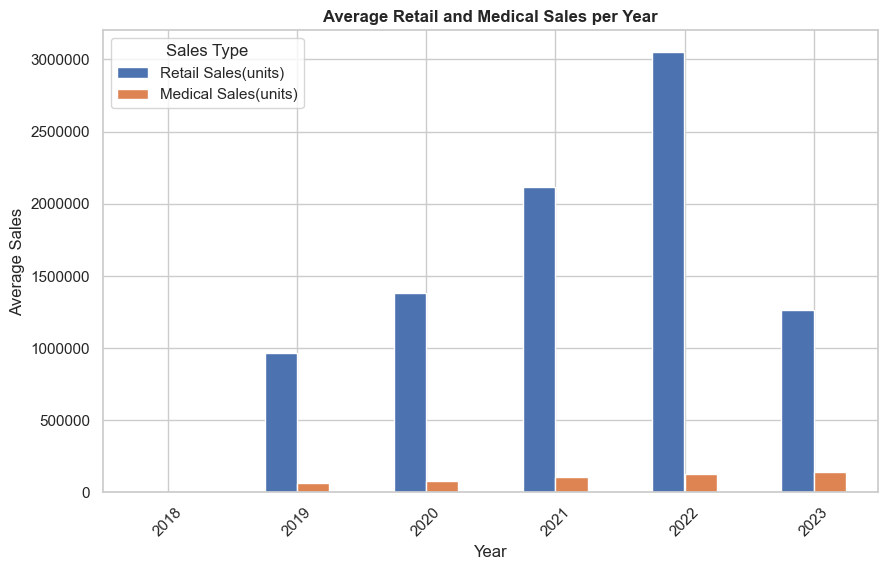

In [326]:
#plot a bar graph on the average sales per year
average_sales_year.plot(kind='bar', figsize=(10,6))
plt.title('Average Retail and Medical Sales per Year', fontweight = "bold")
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Type')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

In [327]:
#create new dataframe groupbed by product type and year and resset the index
grouped_df = second_df.groupby(['Product Type', 'Year']).agg({'Retail Sales(units)': 'sum', 'Medical Sales(units)': 'sum'}).reset_index()
grouped_df.head()

,Product Type,Year,Retail Sales(units),Medical Sales(units)
0,cannabis extracts extraits de cannabis,2019,1049816.00,545423.00
1,cannabis extracts extraits de cannabis,2020,12041601.00,2701541.00
2,cannabis extracts extraits de cannabis,2021,23439323.00,2887763.00
3,cannabis extracts extraits de cannabis,2022,7784970.00,2917866.00
4,cannabis extracts extraits de cannabis,2023,4669289.00,1562058.00


In [328]:
#Group by Product Type to illustrate the performance of different Products over time; illustrate market growth
product_df = grouped_df.groupby(["Product Type", "Year"])
#Mean of Sales per Product
average_sales_per_product = product_df[["Retail Sales(units)", "Medical Sales(units)"]].mean()
average_sales_per_product

Retail Sales(units)  \
Product Type                                       Year                        
cannabis extracts  extraits de cannabis            2019           1049816.00   
                                                   2020          12041601.00   
                                                   2021          23439323.00   
                                                   2022           7784970.00   
                                                   2023           4669289.00   
cannabis seeds  graines de cannabis                2019              1925.00   
                                                   2020             27613.00   
                                                   2021             61014.00   
                                                   2022             25291.00   
                                                   2023                 0.00   
cannabis topicals  cannabis pour usage topique     2019               328.00   
                                                   2020             85989.00   
                                                   2021            351901.00   
                                                   2022            102532.00   
                                                   2023            114612.00   
dried cannabis  cannabis séché                     2018                 0.00   
                                                   2019          16269670.00   
                                                   2020          72793897.00   
                                                   2021          97351592.00   
                                                   2022          82984430.00   
                                                   2023                 0.00   
edible cannabis  cannabis comestible               2019             81698.00   
                                                   2020          14289676.00   
                                                   2021          31193102.00   
                                                   2022           9732232.00   
                                                   2023          11598731.00   
vegetative cannabis plants  plantes de cannabis... 2019                31.00   
                                                   2020               121.00   
                                                   2021                57.00   
                                                   2022                71.00   
                                                   2023             12221.00   
whole cannabis plants  plantes de cannabis enti... 2019                 0.00   
                                                   2020                 0.00   
                                                   2021                 0.00   
                                                   2022                 0.00   
                                                   2023                 0.00   

                                                         Medical Sales(units)  
Product Type                                       Year                        
cannabis extracts  extraits de cannabis            2019             545423.00  
                                                   2020            2701541.00  
                                                   2021            2887763.00  
                                                   2022            2917866.00  
                                                   2023            1562058.00  
cannabis seeds  graines de cannabis                2019                107.00  
                                                   2020                423.00  
                                                   2021                420.00  
                                                   2022                 80.00  
                                                   2023                201.00  
cannabis topicals  cannabis pour usage topique     2019 

In [329]:
#Use my grouped_df (grouped by Year/Product Type) to calculate the Sales Increase overtime(%)
grouped_df['Retail Sales Increase %'] = grouped_df[('Retail Sales(units)')].pct_change() * 100
grouped_df['Medical Sales Increase %'] = grouped_df[('Medical Sales(units)')].pct_change() * 100
grouped_df

,Product Type,Year,Retail Sales(units),Medical Sales(units),Retail Sales Increase %,Medical Sales Increase %
0,cannabis extracts extraits de cannabis,2019,1049816.00,545423.00,NaN,NaN
1,cannabis extracts extraits de cannabis,2020,12041601.00,2701541.00,1047.02,395.31
2,cannabis extracts extraits de cannabis,2021,23439323.00,2887763.00,94.65,6.89
3,cannabis extracts extraits de cannabis,2022,7784970.00,2917866.00,-66.79,1.04
4,cannabis extracts extraits de cannabis,2023,4669289.00,1562058.00,-40.02,-46.47
5,cannabis seeds graines de cannabis,2019,1925.00,107.00,-99.96,-99.99
6,cannabis seeds graines de cannabis,2020,27613.00,423.00,1334.44,295.33
7,cannabis seeds graines de cannabis,2021,61014.00,420.00,120.96,-0.71
8,cannabis seeds graines de cannabis,2022,25291.00,80.00,-58.55,-80.95
9,cannabis seeds graines de cannabis,2023,0.00,201.00,-100.00,151.25


In [330]:
# Group by Inventory - to illustrate the growth of production in the industry (Retail vs Medical) over time 
year_df = second_df.groupby(["Year"])

#sum of inventory over time
inventory_df = second_df.groupby(["Year"])
inventory_sum_per_year = inventory_df[["Federal Inventory", "Retail Inventory"]].sum()
pd.set_option('display.float_format', '{:.2f}'.format)
print(inventory_sum_per_year)

      Federal Inventory  Retail Inventory
Year                                     
2018               0.00              0.00
2019        51481869.00       41129912.00
2020       325924641.00      218067558.00
2021       476736365.00      320536109.00
2022       510611149.00      372598606.00
2023       243898154.00      205274184.00


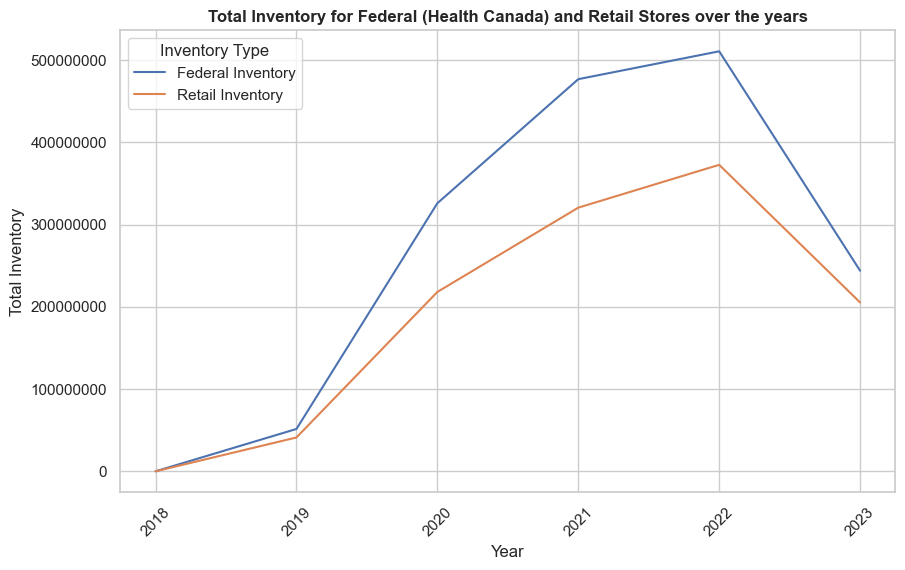

In [331]:
#Plot this to illustrate the growth or decline of production in inventory over the years
inventory_sum_per_year.plot(kind='line', figsize=(10,6))
plt.title('Total Inventory for Federal (Health Canada) and Retail Stores over the years', fontweight = "bold")
plt.xlabel('Year')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.legend(title='Inventory Type')
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

## Data Analysis and Conclusions

__Summary Statistics__
- Looking at the means of the sales per month, sales for retail units were higher than medical units by an exceptionally large amount. However, it should be noted that the use-case of the retail units were not analyzed, which may overlap with medical use but may not been taken accounted for. 

__Visualization Analysis__

Average Retails and Medical Sales per Year: 
- Both Retail Sales and Medical Sales had increased from 2018 to 2022, with only Retail Sales experiencing a drop in 2023. However, Retail Sales were much greater than Medical Sales and increased at a much larger rate than Medical Sales did. 

Total Inventory for Federal (Health Canada) and Retail Stores over the years: 
- From 2018 to 2023, the Federal Inventory was consistently higher than the Retail Inventory. Both experienced a drop in 2023, which is in line with the Sales data. 

__Conclusions__
- Retail Sales were higher and grew at a much faster rate than Medical Sales from 2017 most likely  due to the recent legalization of recreational cannabis in 2017.
- Additionally, the drop in Retail Salesa and Inventory in 2023 may suggest that the high demand for recreational cannabis has started to taper down and become more stable like the medical cannabis market as shown by their steady increase in sales and inventory.
- When looking at both plots together, it seems that there is a higher turnover for Retail products than Medical products. This may again be attributed to the fact that cannabis was just legalized for recreational use in 2017, making the recreational cannabis market a newer market than the medical use market. 

# __Topic 3: Cannabis Market Share by Product Type__

## Data Import and Cleaning

In [332]:
#import necessary libraries and dependencies for the analysis
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Store filepaths into variable
CANNABIS_DATA = Path("Resources", "Canada_cannabis_data.csv")
#Read in files.
cannabis_canada_df = pd.read_csv(CANNABIS_DATA)

In [333]:
# Size of the original data
print(cannabis_canada_df.shape)

#print dataframe
cannabis_canada_df.head()

(327, 17)


,_id,year_-_month,product_type,unpackaged_production_units,unpackaged_inventory_units,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical,unpackaged_production_kilograms,unpackaged_inventory_kilograms,packaged_production_kilograms,packaged_inventory_kilograms_-_federal_licence_holders,packaged_inventory_kilograms_-_provincial_distributors_and_reta,sales_kilograms_-_medical,sales_kilograms_-_non-medical
0,1,2019-10,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,732388,5630075,1820111,167357,320201,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
1,2,2019-11,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,430658,5595722,1676016,182506,328908,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
2,3,2019-12,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,1245160,5882326,1776396,195560,400707,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
3,4,2020-01,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,973120,6009120,1803543,201236,527978,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d
4,5,2020-02,cannabis extracts / extraits de cannabis,n/a / n/d,n/a / n/d,1127995,5877090,2023192,187945,599407,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d,n/a / n/d


In [334]:
# Removing columns which are not needed
Columns_delete =['unpackaged_production_units','unpackaged_inventory_units', 'unpackaged_production_kilograms', 'unpackaged_inventory_kilograms', 'packaged_production_kilograms',
                 'packaged_inventory_kilograms_-_federal_licence_holders', 'packaged_inventory_kilograms_-_provincial_distributors_and_reta', 
                 'sales_kilograms_-_medical', 'sales_kilograms_-_non-medical']
cannabis_refined_df = cannabis_canada_df.drop(Columns_delete, axis=1 )

# Setting index to the _id column 
cannabis_refined_df.set_index('_id', inplace= True)
#remove index header
cannabis_refined_df.index.name= None

#print dataframe to verify changes
cannabis_refined_df.head()

,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
1,2019-10,cannabis extracts / extraits de cannabis,732388,5630075,1820111,167357,320201
2,2019-11,cannabis extracts / extraits de cannabis,430658,5595722,1676016,182506,328908
3,2019-12,cannabis extracts / extraits de cannabis,1245160,5882326,1776396,195560,400707
4,2020-01,cannabis extracts / extraits de cannabis,973120,6009120,1803543,201236,527978
5,2020-02,cannabis extracts / extraits de cannabis,1127995,5877090,2023192,187945,599407


In [335]:
cannabis_refined_df.dtypes


year_-_month                                                       object
product_type                                                       object
packaged_production_units                                          object
packaged_inventory_units_-_federal_licence_holders                 object
packaged_inventory_units_-_provincial_distributors_and_retailer    object
sales_units_-_medical                                              object
sales_units_-_non-medical                                          object
dtype: object

In [336]:
# convert year_-_month column to datetime using pd.to_datetime with predefined format
cannabis_refined_df['year_-_month'] = cannabis_refined_df['year_-_month'].str.strip()
cannabis_refined_df['year_-_month'] = pd.to_datetime(cannabis_refined_df['year_-_month'], format='%Y-%m')
#clean data columns without dates
cannabis_refined_df.replace({'n/a / n/d': 0})

#print dataframe to verify changes
cannabis_refined_df.head()

,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
1,2019-10-01,cannabis extracts / extraits de cannabis,732388,5630075,1820111,167357,320201
2,2019-11-01,cannabis extracts / extraits de cannabis,430658,5595722,1676016,182506,328908
3,2019-12-01,cannabis extracts / extraits de cannabis,1245160,5882326,1776396,195560,400707
4,2020-01-01,cannabis extracts / extraits de cannabis,973120,6009120,1803543,201236,527978
5,2020-02-01,cannabis extracts / extraits de cannabis,1127995,5877090,2023192,187945,599407


In [337]:
#Retrieving list of columns
cannabis_refined_df.columns

Index(['year_-_month', 'product_type', 'packaged_production_units',
       'packaged_inventory_units_-_federal_licence_holders',
       'packaged_inventory_units_-_provincial_distributors_and_retailer',
       'sales_units_-_medical', 'sales_units_-_non-medical'],
      dtype='object')

In [338]:
#Converting columns to numeric for calculations and graph plotting 
INTEGER_COLUMNS = ['packaged_production_units','packaged_inventory_units_-_federal_licence_holders',
       'packaged_inventory_units_-_provincial_distributors_and_retailer',
       'sales_units_-_medical', 'sales_units_-_non-medical' ]
cannabis_refined_df[INTEGER_COLUMNS] = cannabis_refined_df[INTEGER_COLUMNS].apply(pd.to_numeric, errors='coerce')

#print dataframe to verify changes
cannabis_refined_df.head()


,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
1,2019-10-01,cannabis extracts / extraits de cannabis,732388.00,5630075.00,1820111.00,167357.00,320201.00
2,2019-11-01,cannabis extracts / extraits de cannabis,430658.00,5595722.00,1676016.00,182506.00,328908.00
3,2019-12-01,cannabis extracts / extraits de cannabis,1245160.00,5882326.00,1776396.00,195560.00,400707.00
4,2020-01-01,cannabis extracts / extraits de cannabis,973120.00,6009120.00,1803543.00,201236.00,527978.00
5,2020-02-01,cannabis extracts / extraits de cannabis,1127995.00,5877090.00,2023192.00,187945.00,599407.00


In [339]:
# Extracting only the name in english before "/" in product_type column
cannabis_refined_df['product_type']= cannabis_refined_df['product_type'].str.split('/').str[0].str[:-1]

#print dataframe to verify changes
cannabis_refined_df.head()

,year_-_month,product_type,packaged_production_units,packaged_inventory_units_-_federal_licence_holders,packaged_inventory_units_-_provincial_distributors_and_retailer,sales_units_-_medical,sales_units_-_non-medical
1,2019-10-01,cannabis extracts,732388.00,5630075.00,1820111.00,167357.00,320201.00
2,2019-11-01,cannabis extracts,430658.00,5595722.00,1676016.00,182506.00,328908.00
3,2019-12-01,cannabis extracts,1245160.00,5882326.00,1776396.00,195560.00,400707.00
4,2020-01-01,cannabis extracts,973120.00,6009120.00,1803543.00,201236.00,527978.00
5,2020-02-01,cannabis extracts,1127995.00,5877090.00,2023192.00,187945.00,599407.00


In [340]:
#Renaming columns 
cannabis_refined_df= cannabis_refined_df.rename(columns={'year_-_month': "Date", 'product_type': "Product Type",
                                                         'packaged_production_units': "Packaged Production Units",
                                                         'packaged_inventory_units_-_federal_licence_holders': "Inventory- Federal License",
                                                         'packaged_inventory_units_-_provincial_distributors_and_retailer': "Inventory- Provincial",
                                                         'sales_units_-_medical': "Medical Sales Units", 'sales_units_-_non-medical': "Non Medical Sales Units"})
#print colmns to verify changes
cannabis_refined_df.columns

Index(['Date', 'Product Type', 'Packaged Production Units',
       'Inventory- Federal License', 'Inventory- Provincial',
       'Medical Sales Units', 'Non Medical Sales Units'],
      dtype='object')

In [341]:
cannabis_refined_df.head()

,Date,Product Type,Packaged Production Units,Inventory- Federal License,Inventory- Provincial,Medical Sales Units,Non Medical Sales Units
1,2019-10-01,cannabis extracts,732388.00,5630075.00,1820111.00,167357.00,320201.00
2,2019-11-01,cannabis extracts,430658.00,5595722.00,1676016.00,182506.00,328908.00
3,2019-12-01,cannabis extracts,1245160.00,5882326.00,1776396.00,195560.00,400707.00
4,2020-01-01,cannabis extracts,973120.00,6009120.00,1803543.00,201236.00,527978.00
5,2020-02-01,cannabis extracts,1127995.00,5877090.00,2023192.00,187945.00,599407.00


## Data Visualization 

In [342]:
# creating a new dataframe grouped by product type for determining most used cannabis type based on the total sales
product_df = cannabis_refined_df .groupby("Product Type")
Total_product = product_df[['Packaged Production Units', 'Medical Sales Units','Non Medical Sales Units' ]].sum()
Total_product

,Packaged Production Units,Medical Sales Units,Non Medical Sales Units
Product Type,,,
cannabis extracts,67438657.00,7122058.00,48984999.00
cannabis seeds,318926.00,1231.00,115843.00
cannabis topicals,1863799.00,217620.00,655362.00
dried cannabis,330401020.00,8038721.00,269399589.00
edible cannabis,105027765.00,3778130.00,66895439.00
vegetative cannabis plants,31546.00,28785.00,12501.00
whole cannabis plants,0.00,0.00,0.00


In [343]:
# determining the most used products for each purpose, and the product with the highest production
Most_used_medical= Total_product['Medical Sales Units'].max()
value= Total_product['Medical Sales Units'].idxmax()
value_recreational= Total_product['Non Medical Sales Units'].idxmax()
value_productio= Total_product['Packaged Production Units'].idxmax()

print("Type of cannabis most used for Medical purposes is : " + value)
print("Type of cannabis most used for Non Medical purposes is : " + value_recreational)
print("Type of cannabis with highest packaged production till date is : " + value_productio)


Type of cannabis most used for Medical purposes is : dried cannabis
Type of cannabis most used for Non Medical purposes is : dried cannabis
Type of cannabis with highest packaged production till date is : dried cannabis


In [344]:
# creating a new dataframe grouped by product type AND year for determining total cannabis use type by year
product_year_df = cannabis_refined_df .groupby(["Product Type",cannabis_refined_df['Date'].dt.year])
Total_product_year = product_year_df[['Packaged Production Units', 'Medical Sales Units','Non Medical Sales Units' ]].sum()
Total_product_year

Packaged Production Units  \
Product Type               Date                              
cannabis extracts          2019                 2408206.00   
                           2020                22838112.00   
                           2021                32312452.00   
                           2022                 9879887.00   
                           2023                       0.00   
cannabis seeds             2019                     864.00   
                           2020                  118564.00   
                           2021                  124743.00   
                           2022                   65459.00   
                           2023                    9296.00   
cannabis topicals          2019                       0.00   
                           2020                  351282.00   
                           2021                 1087235.00   
                           2022                  242223.00   
                           2023                  183059.00   
dried cannabis             2018                       0.00   
                           2019                19931745.00   
                           2020                95189610.00   
                           2021               121728585.00   
                           2022                93551080.00   
                           2023                       0.00   
edible cannabis            2019                 1263820.00   
                           2020                32004741.00   
                           2021                44959463.00   
                           2022                13123450.00   
                           2023                13676291.00   
vegetative cannabis plants 2019                     224.00   
                           2020                   18715.00   
                           2021                    2084.00   
                           2022                    1527.00   
                           2023                    8996.00   
whole cannabis plants      2019                       0.00   
                           2020                       0.00   
                           2021                       0.00   
                           2022                       0.00   
                           2023                       0.00   

                                 Medical Sales Units  Non Medical Sales Units  
Product Type               Date                                                
cannabis extracts          2019            545423.00               1049816.00  
                           2020           2701541.00              12041601.00  
                           2021           2887763.00              23439323.00  
                           2022            749301.00               7784970.00  
                           2023            238030.00               4669289.00  
cannabis seeds             2019               107.00                  1925.00  
                           2020               423.00                 27613.00  
                           2021               420.00                 61014.00  
                           2022                80.00                 25291.00  
                           2023               201.00                     0.00  
cannabis topicals          2019                 6.00                   328.00  
                           2020              4057.00                 85989.00  
                           2021             74700.00                351901.00  
                           2022             39197.00                102532.00  
                           2023             99660.00                114612.00  
dried cannabis             2018                 0.00                     0.00  
                           2019            587173.00              16269670.00  
                           2020           2572844.00              72793897.00  
                           2021           2713986.00              97351592.0

Date                        2018        2019        2020         2021  \
Product Type                                                            
cannabis extracts            NaN  2408206.00 22838112.00  32312452.00   
cannabis seeds               NaN      864.00   118564.00    124743.00   
cannabis topicals            NaN        0.00   351282.00   1087235.00   
dried cannabis              0.00 19931745.00 95189610.00 121728585.00   
edible cannabis              NaN  1263820.00 32004741.00  44959463.00   
vegetative cannabis plants   NaN      224.00    18715.00      2084.00   
whole cannabis plants        NaN        0.00        0.00         0.00   

Date                              2022        2023  
Product Type                                        
cannabis extracts           9879887.00        0.00  
cannabis seeds                65459.00     9296.00  
cannabis topicals            242223.00   183059.00  
dried cannabis             93551080.00        0.00  
edible cannabis         

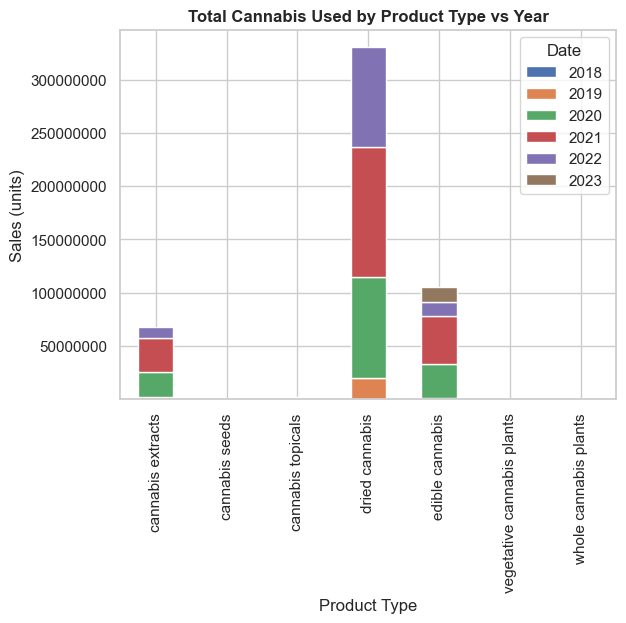

In [345]:
# creating pivotted dataframe for plotting total cannabis use by product type against the year
plot_production_year = product_year_df[['Packaged Production Units' ]].sum()
new_df= plot_production_year.pivot_table(index= 'Product Type', columns= 'Date', values='Packaged Production Units')
print(new_df)

#plot a bar graph for the product type by year
new_df.plot(kind= 'bar', stacked= True)
plt.title("Total Cannabis Used by Product Type vs Year", fontweight = "bold")
plt.xlabel("Product Type")
plt.ylabel("Sales (units)")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))

## Data Analysis and Conclusions

__Visualization Analysis__

Total Cannabis Used by Product Type vs Year: 
- Dried Cannabis was the most used product throughout 2018 to 2023, which is understandable given that the other type of products require further processing
- The most growth in product sales occurred from 2020 to 2022
- Relative to the dried cannabis, edibles, and extracts sales from 2018 to 2023, seeds, topicals, and plants, had significantly less sales from 2018 to 2023

__Conclusions__
- The cannabis market has grown significantly since the legalization of recreational cannabis in 2017
Currently, most users would prefer consuming cannabis in it a readily-edible form as opposed to growing it themselves based on the product selling trends of retail stores from 2018 to 2023

# __Topic 4: Yearly Cannabis Use Change by Gender: 2017 to 2022__


## Data Import and Cleaning

Limitations
- population was rounded to the nearest 1000, so values may be slightly off
- not all users/non-users are captured in these surveys; survey responses were voluntary 
- 2023 survey data not available yet 

In [346]:
#import necessary libraries and dependencies for dataframe analysis and visualizations 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

In [347]:
#setting file path of the yearly cannabis dataset and storing the contents as a dataframe
filepath = Path("Resources/cannabisdataset.csv")
data_file_df = pd.read_csv(filepath, encoding="utf-8")
data_file_df

,Year,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total
0,2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181
1,2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586
2,2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878
3,2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017
4,2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436
5,2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416


In [348]:
#reindexing dataframe using Year, and creating new Total column to determine yearly sample size
reindexed_df = data_file_df.set_index("Year")
reindexed_df["Total"] = reindexed_df["Used - Overall Total"] + reindexed_df["Not Used - Overall Total"]
reindexed_df

,Used - Females,Not Used - Females,Used - Males,Not Used - Males,Used - 16-19,Not Used - 16-19,Used - 20-24,Not Used - 20-24,Used - 25+,Not Used - 25+,Used - Overall Total,Not Used - Overall Total,Total
Year,,,,,,,,,,,,,
2017,2589650,12208350,3656088,10351912,666231,954769,1002621,1240379,4607912,20435088,6272819,22634181,28907000
2018,2447456,11458544,3887550,10782450,591665,1029335,982434,1260566,4733127,20309873,6330414,22575586,28906000
2019,3072087,11768913,4021732,10040268,718103,902897,1150659,1092341,5233987,19809013,7111122,21795878,28907000
2020,3473262,11369738,4317341,9745659,705135,1063376,1177575,1065425,5910148,19132852,7775983,21131017,28907000
2021,3280303,11562697,4022018,10040982,594907,1024472,1090098,1152902,5609632,19433368,7284564,21622436,28907000
2022,3863574,11778426,4434210,10495790,591008,1014992,1105404,1096596,6610461,20152539,8315584,22256416,30572000


## Data Visualization 

Text(0, 0.5, 'Population (Use by Gender Only)')

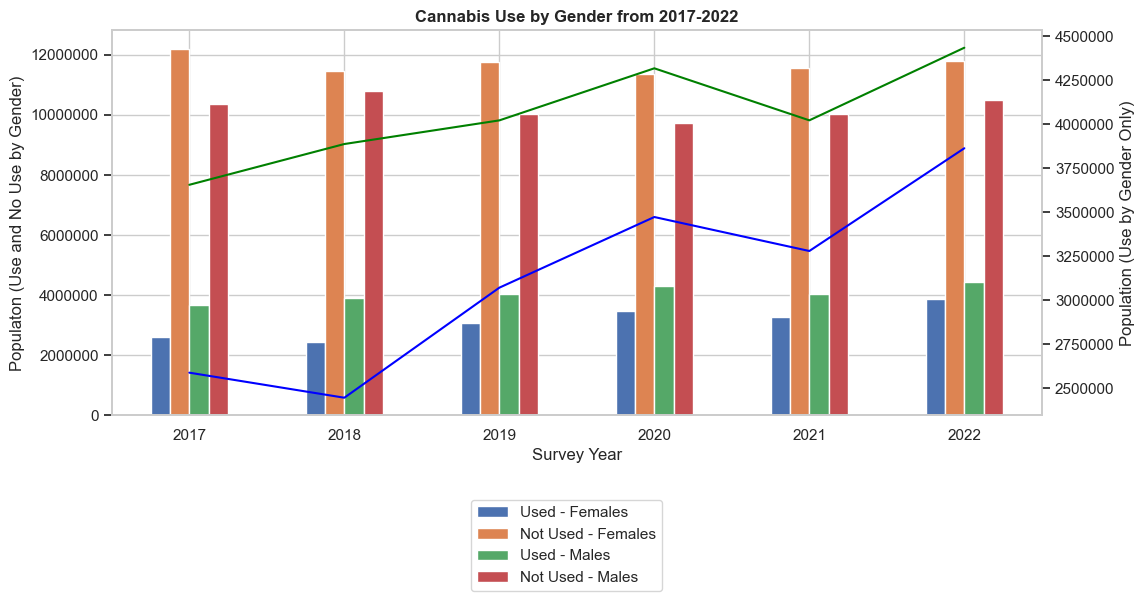

In [349]:
#creating a dataframe to plot a bar graph with only the gender columns 
gender_bar_plot_df = reindexed_df[["Used - Females", "Not Used - Females", "Used - Males", "Not Used - Males"]]
axgenderbar = gender_bar_plot_df.plot(kind="bar", figsize=(12,5), rot = 0)
#setting labels for the gender bar plot, and removing the scienfitic notation from the y-axis
plt.title("Cannabis Use by Gender from 2017-2022", fontweight = "bold")
plt.xlabel("Survey Year")
plt.ylabel("Populaton (Use and No Use by Gender)")
plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
#anchoring legend to outside the graph and at the bottom centre of the figure
axgenderbar.get_legend().set_bbox_to_anchor((0.6,-0.2))

#creating a dataframe to plot a line graph with only the cannabis-use gender columns on the same axis as the bar graph above
gender_line_plot_df = reindexed_df[["Used - Females", "Not Used - Females", "Used - Males", "Not Used - Males"]]
use_gender_line_plot = gender_line_plot_df[["Used - Females", "Used - Males"]]
axgenderline = axgenderbar.twinx()
#plotting the "Used - Females" and "Used - Males" trends on the same axis as the bar plot above
axgenderline.plot(axgenderbar.get_xticks(), gender_line_plot_df["Used - Females"], color = "blue")
axgenderline.plot(axgenderbar.get_xticks(), gender_line_plot_df["Used - Males"], color = "green")
axgenderline.grid(False)
#setting labels for the gender line plot y-axis and removing the scienfitic notation from the y-axis
axgenderline.ticklabel_format(axis='y', style='sci', scilimits=(0, 10000))
axgenderline.set_ylabel("Population (Use by Gender Only)")


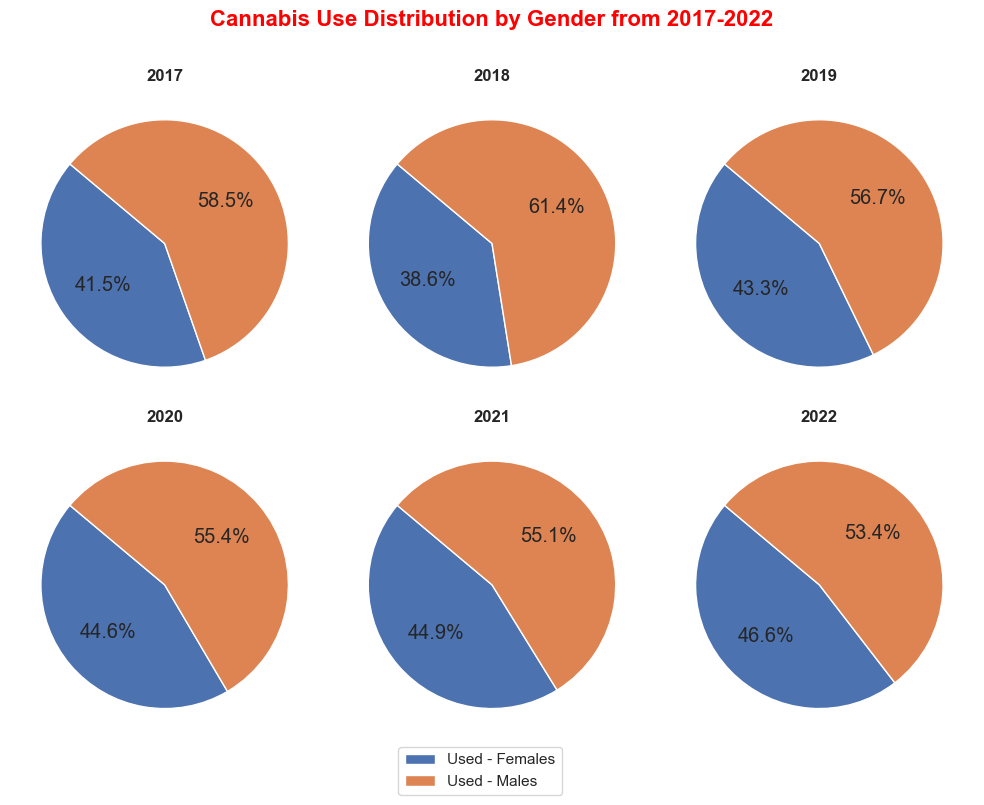

In [350]:
#creating subplots and setting figure size and title
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(10,8)
fig.suptitle('Cannabis Use Distribution by Gender from 2017-2022', fontsize=16, y = 1, color = "red", fontweight="bold") 

#selecting the cannabis-use columns only 
#creating new dataframes for plotting yearly pie graphs to visualize cannabis-use distribution by gender; 
gender_pie_plot = reindexed_df[["Used - Females", "Used - Males"]]
pie_2017_df = gender_pie_plot.iloc[0, :]
pie_2018_df = gender_pie_plot.iloc[1, :]
pie_2019_df = gender_pie_plot.iloc[2, :]
pie_2020_df = gender_pie_plot.iloc[3, :]
pie_2021_df = gender_pie_plot.iloc[4, :]
pie_2022_df = gender_pie_plot.iloc[5, :]

#creating the cannabis-use distribution pie graphs by gender for each year in the dataset;
#plotting each pie graph in a subplot for comparison of distributions over the years
#2017 cannabis use distribution by gender
ax2017 = pie_2017_df.plot.pie(ax=axes[0,0], autopct="%1.1f%%", startangle=140,  ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
ax2017.set_title("2017", fontweight="bold")
#2018 cannabis use distribution by gender
ax2018 = pie_2018_df.plot.pie(ax=axes[0,1], autopct="%1.1f%%", startangle=140,   ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
ax2018.set_title("2018", fontweight="bold")
#2019 cannabis use distribution by gender
ax2019 = pie_2019_df.plot.pie(ax=axes[0,2], autopct="%1.1f%%", startangle=140,   ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
ax2019.set_title("2019", fontweight="bold")
#2020 cannabis use distribution by gender
ax2020 = pie_2020_df.plot.pie(ax=axes[1,0], autopct="%1.1f%%", startangle=140,  ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
ax2020.set_title("2020", fontweight="bold")
#2021 cannabis use distribution by gender
ax2021 = pie_2021_df.plot.pie(ax=axes[1,1], autopct="%1.1f%%", startangle=140,  ylabel = '', labeldistance=None, legend = True, textprops={'size': 'large'})
ax2021.set_title("2021", fontweight="bold")
#setting legend for the figure at the bottom of the figure 
ax2021.get_legend().set_bbox_to_anchor((0.75,0))
#2022 cannabis use distribution by gender
ax2022 = pie_2022_df.plot.pie(ax=axes[1,2], autopct="%1.1f%%", startangle=140,   ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
ax2022.set_title("2022", fontweight="bold")

#optimizing subplot layout
plt.tight_layout()

## Data Analysis and Conclusions

__Visualizations Analysis__

Cannabis Use by Gender from 2017 to 2022 bar and line graph:
- Both genders have shown an increase over the years in regards to the use of cannabis, with Males consistently using more than Females

Cannabis Use by Gender from 2017 to 2022 pie graphs:
- However, over the years, a larger portion of Females than Males have started using cannabis, reducing the Male majority in the relative distribution of cannabis use by gender over the years 

__Conclusions__
- There is an increase in user of cannabis for both genders over the years, with a higher percentage increase of Females than Males using, resulting in a more equal distribution over the years. This can most likely be attributed to the increased accessibility and social perception of cannabis in recent years. 

# __Topic 5: Cannabis Use Change during First Wave of the Covid Pandemic Analyzed by Age Group, Ethnicity, and Income Level (May 2020 to March 2021)__


## Data Import and Cleaning

In [352]:
#setting file path of the covid pandemic cannabis dataset and storing the contents as a dataframe
covidfilepath = Path("Resources/CannabisCovidPandemicSurvey.csv")
covid_datafile_df = pd.read_csv(covidfilepath, encoding="utf-8")
covid_datafile_df.head()

,respid,prov,hregion,Age_groups,hage,hgender,hhousehold,hchildren,living_area,educ,...,little_depr,mod_depress,sev_depress,rarely_alone,little_lonely,mod_lonely,sev_lonely,low_anxiety,mod_anxiety,sev_anxiety
0,6870,Nova Scotia,QC/ATL,18 to 29 years,18-39,Male,Live with others,No Kids,Suburban area,University degree/diploma,...,0,0,0,1,0,0,0,0,0,0
1,6069,Ontario,ON,18 to 29 years,18-39,Female,Live with others,No Kids,Urban area,University degree/diploma,...,0,1,0,0,0,1,0,1,0,0
2,1904,Ontario,ON,30 to 39 years,18-39,Female,Live with others,No Kids,Urban area,University degree/diploma,...,1,0,0,1,0,0,0,1,0,0
3,1279,British Columbia,BC,30 to 39 years,18-39,Male,Live with others,Kids,Urban area,University degree/diploma,...,0,1,0,0,0,0,1,1,0,0
4,2623,Saskatchewan,SK/MN,70 years and over,60+,Male,Live with others,No Kids,Urban area,University degree/diploma,...,0,0,0,1,0,0,0,0,0,0


In [353]:
#selecting only the columns needed for the analysis and excluding the remaining columns
#printing dataframe info to identify data type and columns with any null values
cannabis_analysis_df = covid_datafile_df[["respid", "Age_groups", "hgender", "racial_grp", "Income", "can_cat", "more_cannabis", "same_cannabis", "less_cannabis", "canabis_change"]]
cannabis_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   respid          6016 non-null   int64  
 1   Age_groups      6016 non-null   object 
 2   hgender         6016 non-null   object 
 3   racial_grp      5857 non-null   object 
 4   Income          6016 non-null   object 
 5   can_cat         6012 non-null   object 
 6   more_cannabis   5748 non-null   float64
 7   same_cannabis   5748 non-null   float64
 8   less_cannabis   5748 non-null   float64
 9   canabis_change  5748 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 470.1+ KB


In [354]:
# Fill null values in the can_cat, racial_grp, more_cannabis, same_cannis, less_cannabis, and cannabis_change columns 
cannabis_analysis_df = cannabis_analysis_df.fillna({"can_cat": "no","racial_grp":'Not Specified',"more_cannabis": 0, "same_cannabis": 1, "less_cannabis": 0, "canabis_change": 3})
# renaming the can_cat column
cannabis_analysis_df = cannabis_analysis_df.rename(columns={"can_cat":"Prepandemic_cannabis_use"})
#confirming all null values have been replaced by printing the dataframe info 
cannabis_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6016 entries, 0 to 6015
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   respid                    6016 non-null   int64  
 1   Age_groups                6016 non-null   object 
 2   hgender                   6016 non-null   object 
 3   racial_grp                6016 non-null   object 
 4   Income                    6016 non-null   object 
 5   Prepandemic_cannabis_use  6016 non-null   object 
 6   more_cannabis             6016 non-null   float64
 7   same_cannabis             6016 non-null   float64
 8   less_cannabis             6016 non-null   float64
 9   canabis_change            6016 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 470.1+ KB


In [355]:
#defining function for interpreting response submission ratings into something more descriptive 
def get_cannabis_change(rating):
    if rating == 1:
        return '1. A lot less'
    elif rating == 2:
        return '2. A little less'
    elif rating == 3:
        return '3. The same'
    elif rating == 4:
        return '4. A little more'
    elif rating == 5:
        return '5. A lot more'

#applying the above rating function to interpret values in the "canabis_change" column and saving the outputs in a new column titled "Cannabis_Use_Change"
cannabis_analysis_df['Cannabis_Use_Change'] =  cannabis_analysis_df["canabis_change"].apply(get_cannabis_change)
#reselectnig the columns needed for the data analysis
cannabis_analysis_df = cannabis_analysis_df[["respid", "Age_groups", "hgender", "racial_grp", "Income", "Prepandemic_cannabis_use", "Cannabis_Use_Change"]]
cannabis_analysis_df.head()

,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
0,6870,18 to 29 years,Male,White,Income missing,no,3. The same
1,6069,18 to 29 years,Female,Asian,40-79k,no,2. A little less
2,1904,30 to 39 years,Female,White,Over 120k,no,3. The same
3,1279,30 to 39 years,Male,Not Specified,Income missing,no,3. The same
4,2623,70 years and over,Male,White,80-119k,no,3. The same


In [356]:
# filtering dataframe to remove response "3. The same" so we can look at how habits have changed during this time period 
change_only_df = cannabis_analysis_df.loc[(cannabis_analysis_df["Cannabis_Use_Change"] == "1. A lot less") | (cannabis_analysis_df["Cannabis_Use_Change"] == "2. A little less")| (cannabis_analysis_df["Cannabis_Use_Change"] == "4. A little more") | (cannabis_analysis_df["Cannabis_Use_Change"] == "5. A lot more"), :]
change_only_df

,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
1,6069,18 to 29 years,Female,Asian,40-79k,no,2. A little less
5,4804,30 to 39 years,Male,Black/Indigenous/Arab/latinos,40-79k,yes,1. A lot less
19,2415,18 to 29 years,Female,White,80-119k,yes,5. A lot more
21,3006,30 to 39 years,Male,White,80-119k,yes,2. A little less
22,999,40 to 49 years,Male,Asian,Over 120k,no,5. A lot more
...,...,...,...,...,...,...,...
6001,2559,60 to 69 years,Female,White,40-79k,yes,4. A little more
6004,124539,30 to 39 years,Male,White,Over 120k,yes,5. A lot more
6005,371,30 to 39 years,Male,White,Over 120k,no,1. A lot less
6007,92408,30 to 39 years,Female,Black/Indigenous/Arab/latinos,40-79k,yes,4. A little more


## Data Visualization - Cannabis Use Change by Age Group

In [357]:
#creating a dataframe grouped by age group and Cannabis_Use_Change, with the Cannabis_Use_Change column pivoted 
age_group_df = cannabis_analysis_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
#removes extra columns and returns only the count on the response IDs
age_group_df = age_group_df[["respid"]]
age_group_df

respid                               \
Cannabis_Use_Change 1. A lot less 2. A little less 3. The same   
Age_groups                                                       
18 to 29 years                 19               27         597   
30 to 39 years                 35               31        1370   
40 to 49 years                 17               20         772   
50 to 59 years                  7               13         900   
60 to 69 years                 10               17        1052   
70 years and over               5               12         702   

                                                    
Cannabis_Use_Change 4. A little more 5. A lot more  
Age_groups                                          
18 to 29 years                    51            32  
30 to 39 years                   123            58  
40 to 49 years                    43            19  
50 to 59 years                    37            14  
60 to 69 years                    21             7  
70 years and over                  3             2

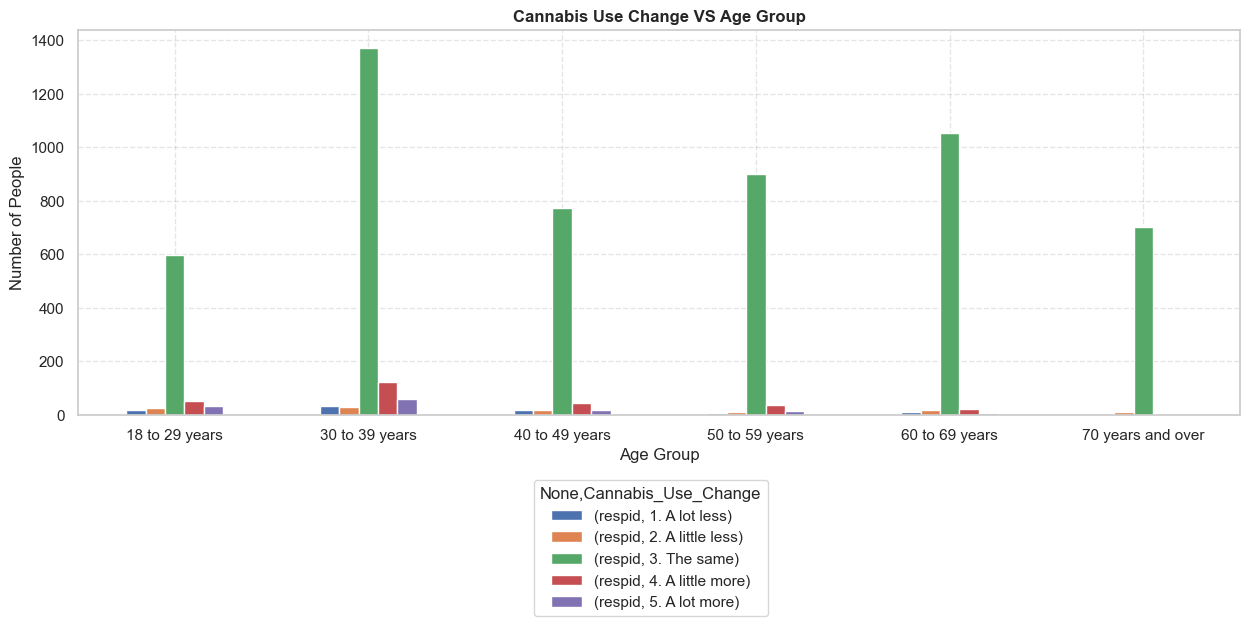

In [358]:
#creating a bar plot on cannabis use change vs age group
axagegroup = age_group_df.plot(kind="bar", figsize=(15,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
#setting labels for the age group bar plot
plt.title("Cannabis Use Change VS Age Group", fontweight = "bold")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
#anchoring legend to outside the graph and at the bottom centre of the figure
axagegroup.get_legend().set_bbox_to_anchor((0.6,-0.15))

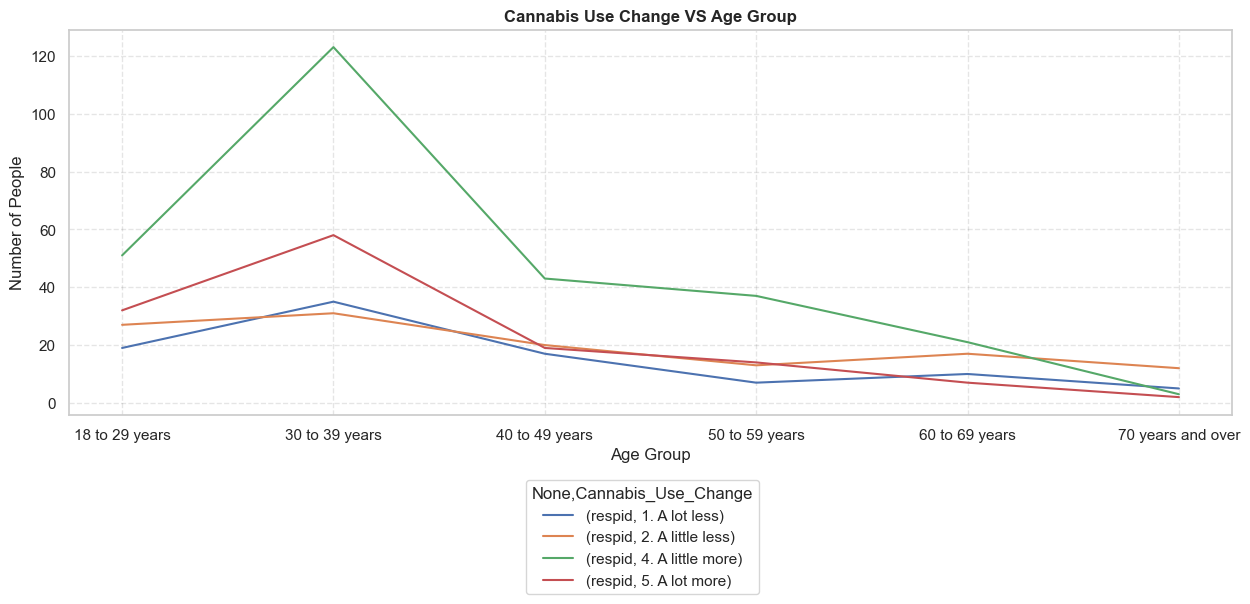

In [359]:
#creating a dataframe grouped by age group and Cannabis_Use_Change, with the Cannabis_Use_Change column pivoted 
#using the dataframe with "3. The Same" response removed to analyze how use has changed during the pandemic
age_group_df2 = change_only_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
#removes extra columns and returns only the count on the response IDs
age_group_df2 = age_group_df2[["respid"]]
axagegroupline2 = age_group_df2.plot(kind="line", figsize=(15,5))
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
#setting labels for the age group bar plot
plt.title("Cannabis Use Change VS Age Group", fontweight = "bold")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
#anchoring legend to outside the graph and at the bottom centre of the figure
axagegroupline2.get_legend().set_bbox_to_anchor((0.6,-0.15))

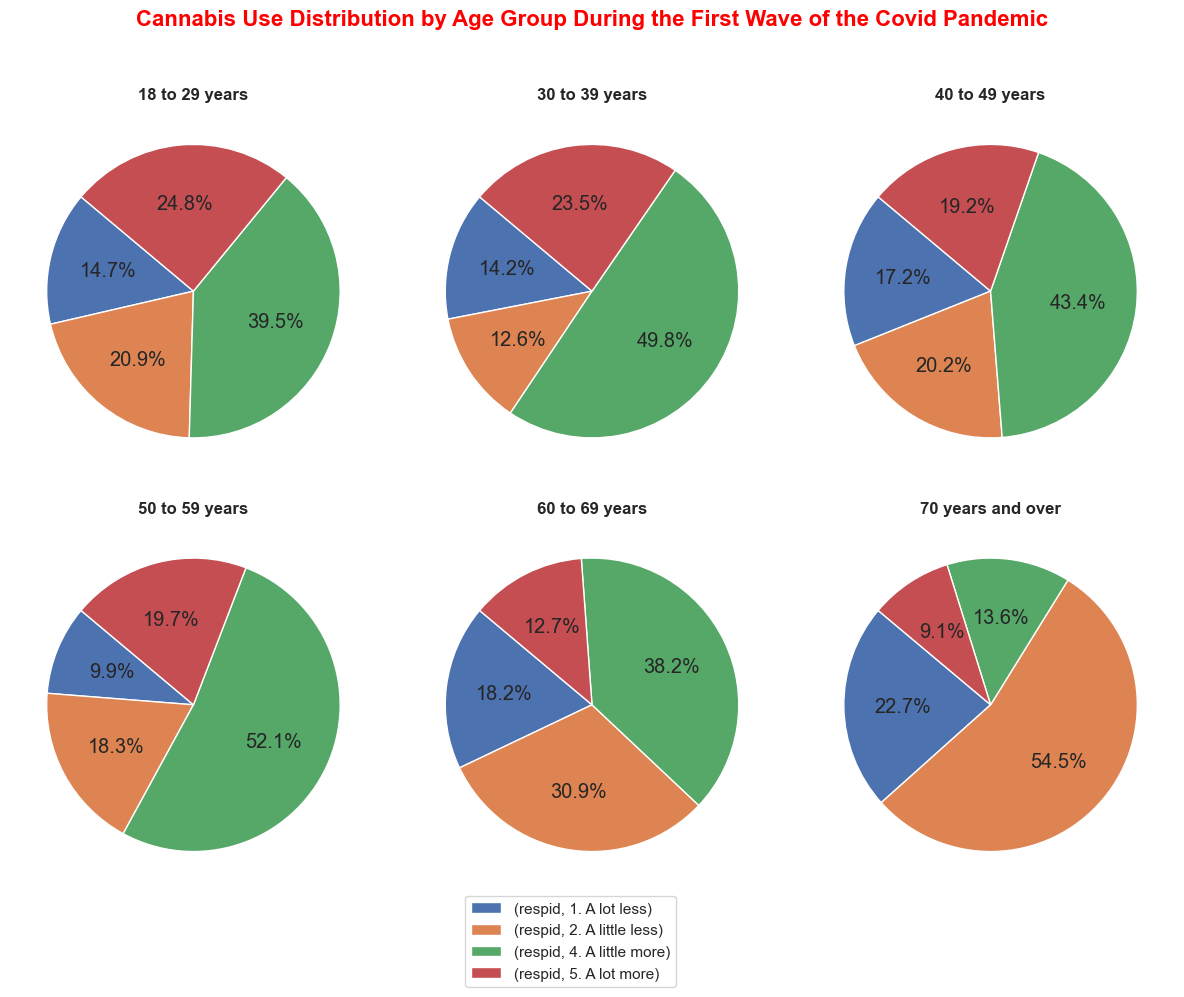

In [360]:
#creating subplots and setting figure size and title
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(12,10)
fig.suptitle('Cannabis Use Distribution by Age Group During the First Wave of the Covid Pandemic', fontsize=16, y = 1, color = "red", fontweight="bold") 

#creating a dataframe grouped by age group and Cannabis_Use_Change
age_group_base_df = change_only_df[["Age_groups", "Cannabis_Use_Change","respid"]]
#creating a dataframe grouped by age group and Cannabis_Use_Change for the "18 to 29 years" age group, with the Cannabis_Use_Change column pivoted 
agegroup1_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "18 to 29 years"), :]
agegroup1_df = agegroup1_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup1_df = agegroup1_df.iloc[0, :]
#plotting a pie chart for the "18 to 29 years" age group
axagepie1 = agegroup1_df.plot.pie(ax=axes[0,0], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
axagepie1.set_title("18 to 29 years", fontweight="bold")

#creating a dataframe grouped by age group and Cannabis_Use_Change for the "30 to 39 years" age group, with the Cannabis_Use_Change column pivoted 
agegroup2_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "30 to 39 years"), :]
agegroup2_df = agegroup2_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup2_df = agegroup2_df.iloc[0, :]
#plotting a pie chart for the "30 to 39 years" age group
axagepie2 = agegroup2_df.plot.pie(ax=axes[0,1], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
axagepie2.set_title("30 to 39 years", fontweight="bold")

#creating a dataframe grouped by age group and Cannabis_Use_Change for the "40 to 49 years" age group, with the Cannabis_Use_Change column pivoted 
agegroup3_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "40 to 49 years"), :]
agegroup3_df = agegroup3_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup3_df = agegroup3_df.iloc[0, :]
#plotting a pie chart for the "40 to 49 years" age group
axagepie3 = agegroup3_df.plot.pie(ax=axes[0,2], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
axagepie3.set_title("40 to 49 years", fontweight="bold")

#creating a dataframe grouped by age group and Cannabis_Use_Change for the "50 to 59 years" age group, with the Cannabis_Use_Change column pivoted 
agegroup4_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "50 to 59 years"), :]
agegroup4_df = agegroup4_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup4_df = agegroup4_df.iloc[0, :]
#plotting a pie chart for the "50 to 59 years" age group
axagepie4 = agegroup4_df.plot.pie(ax=axes[1,0], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
axagepie4.set_title("50 to 59 years", fontweight="bold")

#creating a dataframe grouped by age group and Cannabis_Use_Change for the "60 to 69 years" age group, with the Cannabis_Use_Change column pivoted 
agegroup5_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "60 to 69 years"), :]
agegroup5_df = agegroup5_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup5_df = agegroup5_df.iloc[0, :]
#plotting a pie chart for the "60 to 69 years" age group
axagepie5 = agegroup5_df.plot.pie(ax=axes[1,1], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = True, textprops={'size': 'large'})
axagepie5.set_title("60 to 69 years", fontweight="bold")
#anchoring legend to outside the graph and at the bottom centre of the figure
axagepie5.get_legend().set_bbox_to_anchor((0.75,0))

#creating a dataframe grouped by age group and Cannabis_Use_Change for the "70 years and over" age group, with the Cannabis_Use_Change column pivoted 
agegroup6_df = age_group_base_df.loc[(age_group_base_df["Age_groups"] == "70 years and over"), :]
agegroup6_df = agegroup6_df.groupby(["Age_groups", "Cannabis_Use_Change"]).count().unstack()
agegroup6_df = agegroup6_df.iloc[0, :]
#plotting a pie chart for the "70 years and over" age group
axagepie6 = agegroup6_df.plot.pie(ax=axes[1,2], autopct="%1.1f%%", startangle=140, ylabel = '', labeldistance=None, legend = False, textprops={'size': 'large'})
axagepie6.set_title("70 years and over", fontweight="bold")

#optimizing subplot layout
plt.tight_layout()


##  Data Visualization - Cannabis Use Change by Ethnicity

In [363]:
#setting order of the races for a cleaner look in the plot axis
race = CategoricalDtype(['Asian', 'Black/Indigenous/Arab/latinos', 'White', 'Other', 'Not Specified'], ordered=True)
change_only_df['racial_grp'] = change_only_df['racial_grp'].astype(race)
change_only_df.sort_values(by='racial_grp')

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_5088\797912991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_only_df['racial_grp'] = change_only_df['racial_grp'].astype(race)


,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
1,6069,18 to 29 years,Female,Asian,40-79k,no,2. A little less
2672,6484,30 to 39 years,Male,Asian,40-79k,yes,5. A lot more
1085,2803,40 to 49 years,Male,Asian,40-79k,yes,4. A little more
2666,5271,30 to 39 years,Male,Asian,80-119k,no,1. A lot less
2661,3916,30 to 39 years,Male,Asian,Over 120k,no,2. A little less
...,...,...,...,...,...,...,...
5970,106887,30 to 39 years,Female,Not Specified,Income missing,yes,4. A little more
576,3680,40 to 49 years,Female,Not Specified,Income missing,yes,1. A lot less
5835,6237,50 to 59 years,Female,Not Specified,Less than 40k,yes,4. A little more
501,3333,18 to 29 years,Male,Not Specified,40-79k,yes,4. A little more


Text(0, 0.5, 'Number of People')

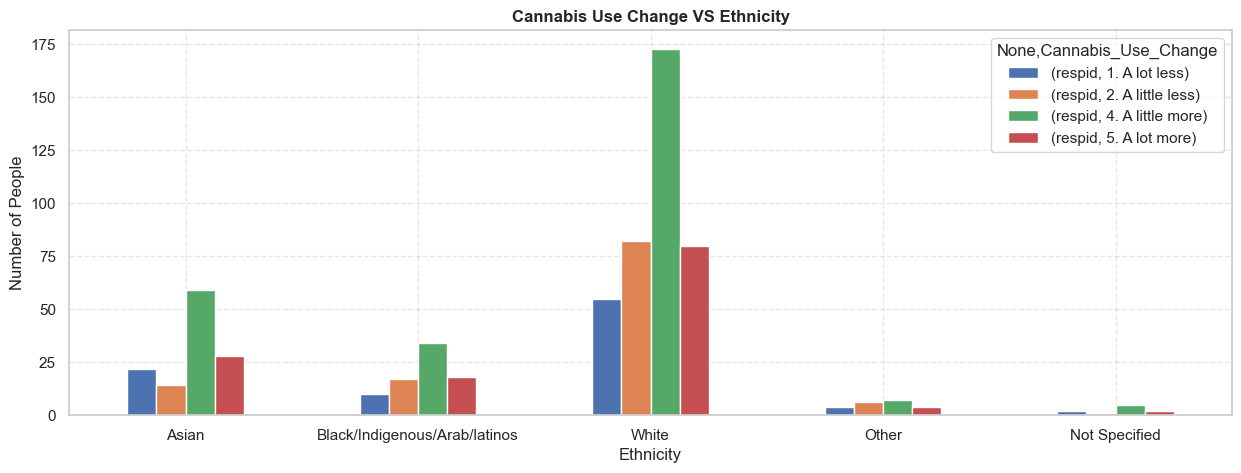

In [364]:
#creating a dataframe grouped by race and Cannabis_Use_Change, with the Cannabis_Use_Change column pivoted 
ethnicity_df2 = change_only_df.groupby(["racial_grp", "Cannabis_Use_Change"]).count().unstack()
#removes extra columns and returns only the count on the response IDs
ethnicity_df2 = ethnicity_df2[["respid"]]
ethnicity_df2.plot(kind="bar", figsize=(15,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
#setting labels for the ethnicity bar plot
plt.title("Cannabis Use Change VS Ethnicity", fontweight = "bold")
plt.xlabel("Ethnicity")
plt.ylabel("Number of People")

##  Data Visualization - Cannabis Use Change by Income Level

In [365]:
#setting order of the incomes for a cleaner look in the plot axis
income = CategoricalDtype(['Less than 40k','40-79k', '80-119k', 'Over 120k','Income missing' ], ordered=True)
change_only_df['Income'] = change_only_df['Income'].astype(income)
change_only_df.sort_values(by='Income')

C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_5088\2514428952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change_only_df['Income'] = change_only_df['Income'].astype(income)


,respid,Age_groups,hgender,racial_grp,Income,Prepandemic_cannabis_use,Cannabis_Use_Change
1108,1594,18 to 29 years,Male,White,Less than 40k,yes,1. A lot less
1776,2154,60 to 69 years,Male,Black/Indigenous/Arab/latinos,Less than 40k,yes,4. A little more
3897,5438,40 to 49 years,Other,White,Less than 40k,yes,5. A lot more
2848,9696,60 to 69 years,Female,White,Less than 40k,no,1. A lot less
2834,2250,18 to 29 years,Female,Other,Less than 40k,yes,1. A lot less
...,...,...,...,...,...,...,...
1340,6134,30 to 39 years,Male,White,Income missing,yes,4. A little more
1334,5955,40 to 49 years,Female,Not Specified,Income missing,yes,1. A lot less
1265,4096,18 to 29 years,Female,White,Income missing,yes,5. A lot more
5201,1917,30 to 39 years,Male,Asian,Income missing,no,2. A little less


Text(0, 0.5, 'Number of People')

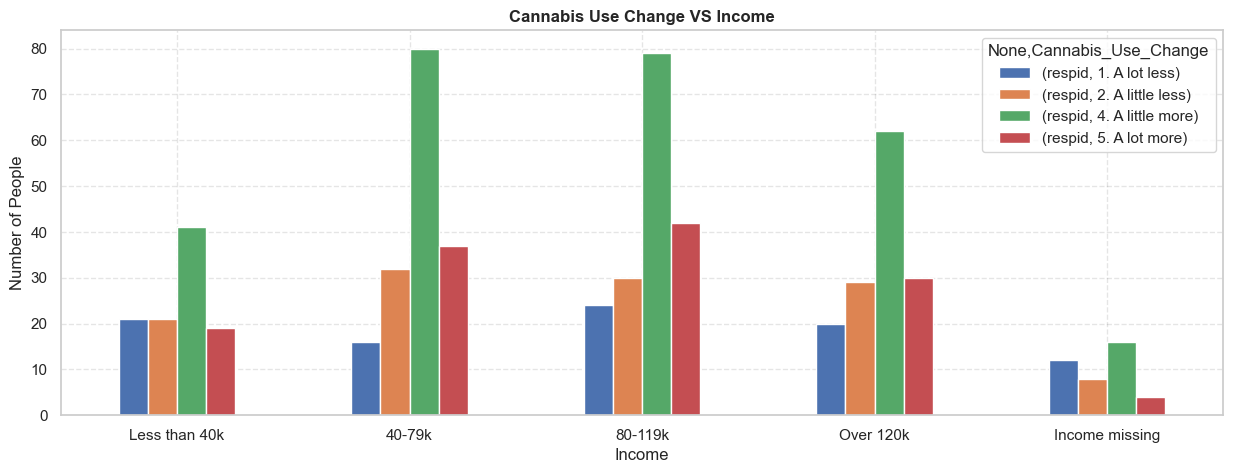

In [366]:
#creating a dataframe grouped by income and Cannabis_Use_Change, with the Cannabis_Use_Change column pivoted 
income_df2 = change_only_df.groupby(["Income", "Cannabis_Use_Change"]).count().unstack()
#removes extra columns and returns only the count on the response IDs
income_df2 = income_df2[["respid"]]
income_df2.plot(kind="bar", figsize=(15,5), rot = 0)
plt.grid(color = 'black', linestyle = '--', alpha=0.1)
#setting labels for the income bar plot
plt.title("Cannabis Use Change VS Income", fontweight = "bold")
plt.xlabel("Income")
plt.ylabel("Number of People")

## Data Analysis and Conclusions

__Visualizations Analysis__

Cannabis Use Change by Age Group line and pie charts:
- Most respondents indicated that their cannabis-use habits remained the same during the first wave.
- When looking at the respondents who only had changes, all age groups had more users that reported an increase in their cannabis usage except for 2 other age groups - 60 to 69 which had only slightly higher respondents indicating more use, and the 70 years and over age group actually had more respondents indicating less use.
- The greatest increase in usage occurred within the 30 to 39 year old age group, followed by 18 to 29.

Cannabis Use Change by Ethnicity:
- Generally, there ha been an increase in cannabis usage across all ethnicities.

Cannabis Use Change by Income Level:
- Generally, there has been an increase in cannabis use across all income levels. 

__Conclusions__
- The greatest increase in suage occurred within the 30 to 39 year old age group, followed by 18 to 29, suggesting greater increase in usage for younger age groups during the first wave.
- The 70 years and over was the only age group that experienced a decrease in the change in cannabis use during the first wave of the pandemic.
- Across all the ethnicities that reported changes in use, a larger portion had indicated an increase in use. This may further suggest that the reason for the changes can be attributed to the circumstances generated by the pandemic given that all ethnicities experienced the same trends.
- All income groups had a higher portion indicating increased use during the first wave of the pandemic. This can be attributed to the accessibility and affordability of recreational cannabis as well as changes in activities due to restrictions imposed by the pandemic.   